# Exploring Thomas Fire Using Satellite Imagery

**Author**: Kat Le

**Github Repository**: https://github.com/katleyq/eds220-hwk4

In [1]:
import os
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

from shapely.geometry import box  # To create polygon bounding box

"""
Set environment variable 'PROJ_LIB' to specify the path for the PROJ library
Resolves ERROR 1: PROJ: proj_create_from_database
"""""
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

pd.set_option("display.max.columns", None)

In [10]:
# Create path to repository data folder
data_folder_fp = os.path.join(#'/',
                              #'Users',
                              #'katherine', 
                              #'MEDS',
                              #'EDS-220',
                              #'eds220-hwk4',
                              'data')

# Load California Fire Perimeter shapefile
thomas_fire = gpd.read_file(f"{data_folder_fp}/thomas_fire.shp")

# Load landsat data
landsat = rioxr.open_rasterio(f"{data_folder_fp}/landsat8-2018-01-26-sb-simplified.nc")

### Explore landsat netCDF

In [11]:
# 
landsat = landsat.squeeze().drop_vars('band')

In [12]:
landsat_array = landsat.to_array()
landsat_array.coords

Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
  * variable     (variable) object 40B 'red' 'green' 'blue' 'nir08' 'swir22'

In [13]:
landsat_array.shape

(5, 731, 870)

In [14]:
thomas_fire = thomas_fire.to_crs(landsat.rio.crs)

In [15]:
print(f"**Landsat CRS** = {landsat.rio.crs}")
print('----')
print(f"**Thomas Fire CRS** = {thomas_fire.crs}")

assert landsat.rio.crs == thomas_fire.crs

**Landsat CRS** = PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]
----
**Thomas Fire CRS** = PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["

ERROR 1: PROJ: proj_identify: /opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


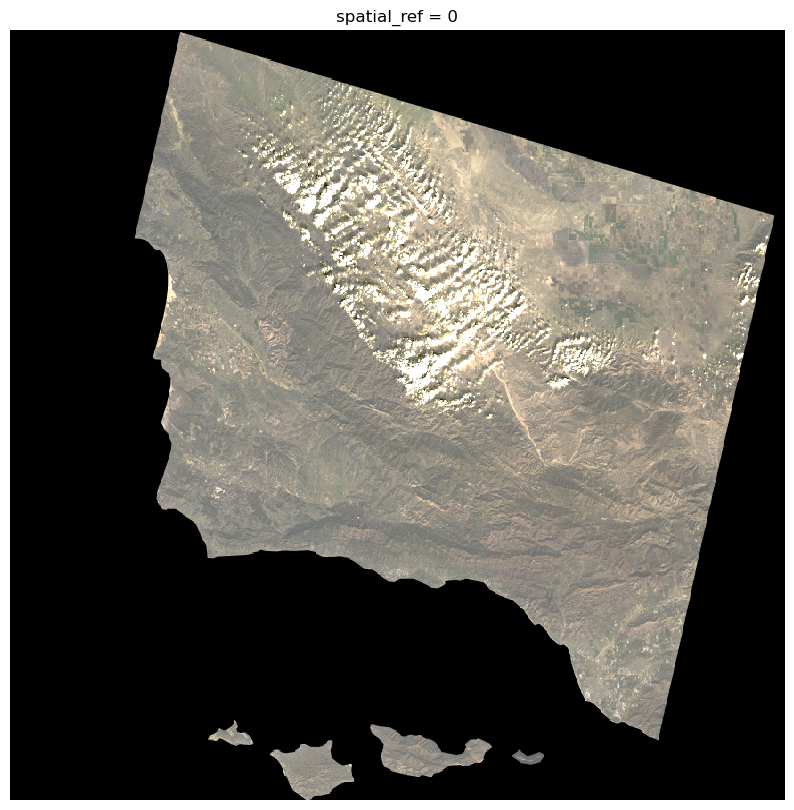

In [16]:
fig, ax = plt.subplots(figsize = (10, 10))

ax.axis('off')

xr.Dataset(landsat[['red', 'green', 'blue']]).to_array().plot.imshow(robust = True)

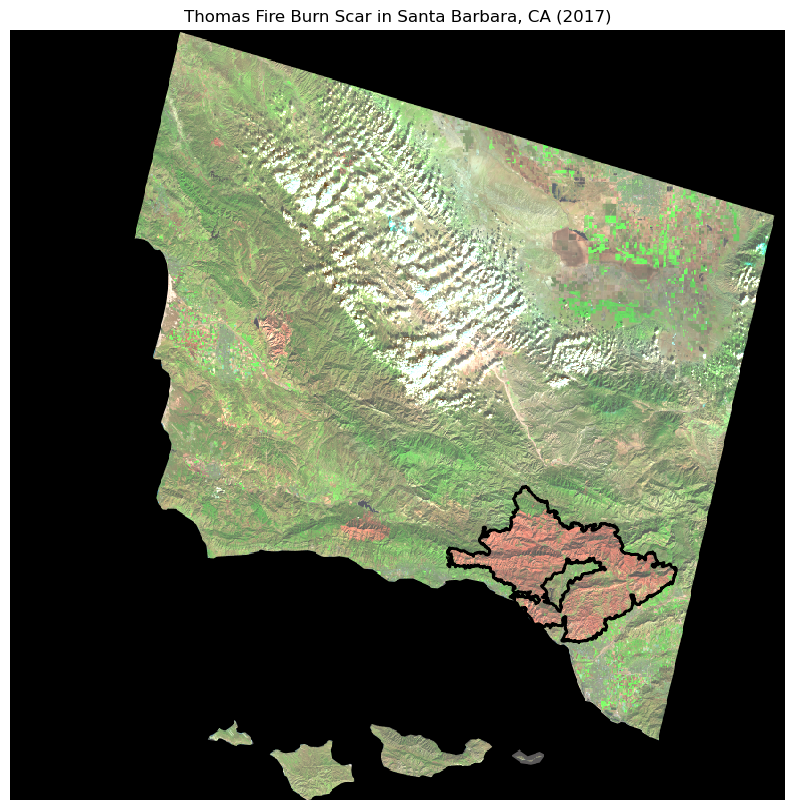

In [21]:
fig, ax = plt.subplots(figsize = (10, 10))

ax.axis('off')

thomas_fire.plot(ax = ax,
                 color = 'none',
                edgecolor = 'black', 
                linewidth = 2, 
                label="Thomas Fire Boundary")

landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax = ax, robust = True)

ax.set_title('Thomas Fire Burn Scar in Santa Barbara, CA (2017)')

plt.show()